<a href="https://colab.research.google.com/github/Pramit33/mypractice/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import datetime as datetime
import missingno as msno
import seaborn as sns
from textblob import TextBlob

In [2]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.sort_values(by = "release_year", ascending = False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
31,s32,TV Show,Chicago Party Aunt,NaN,"Lauren Ash, Rory O'Malley, RuPaul Charles, Jil...",NaN,"September 17, 2021",2021,TV-MA,1 Season,TV Comedies,Chicago Party Aunt Diane is an idolized troubl...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


/tmp/ipython-input-2233043181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = df['director'] , palette='mako', order=df['director'].value_counts().index[0:50])


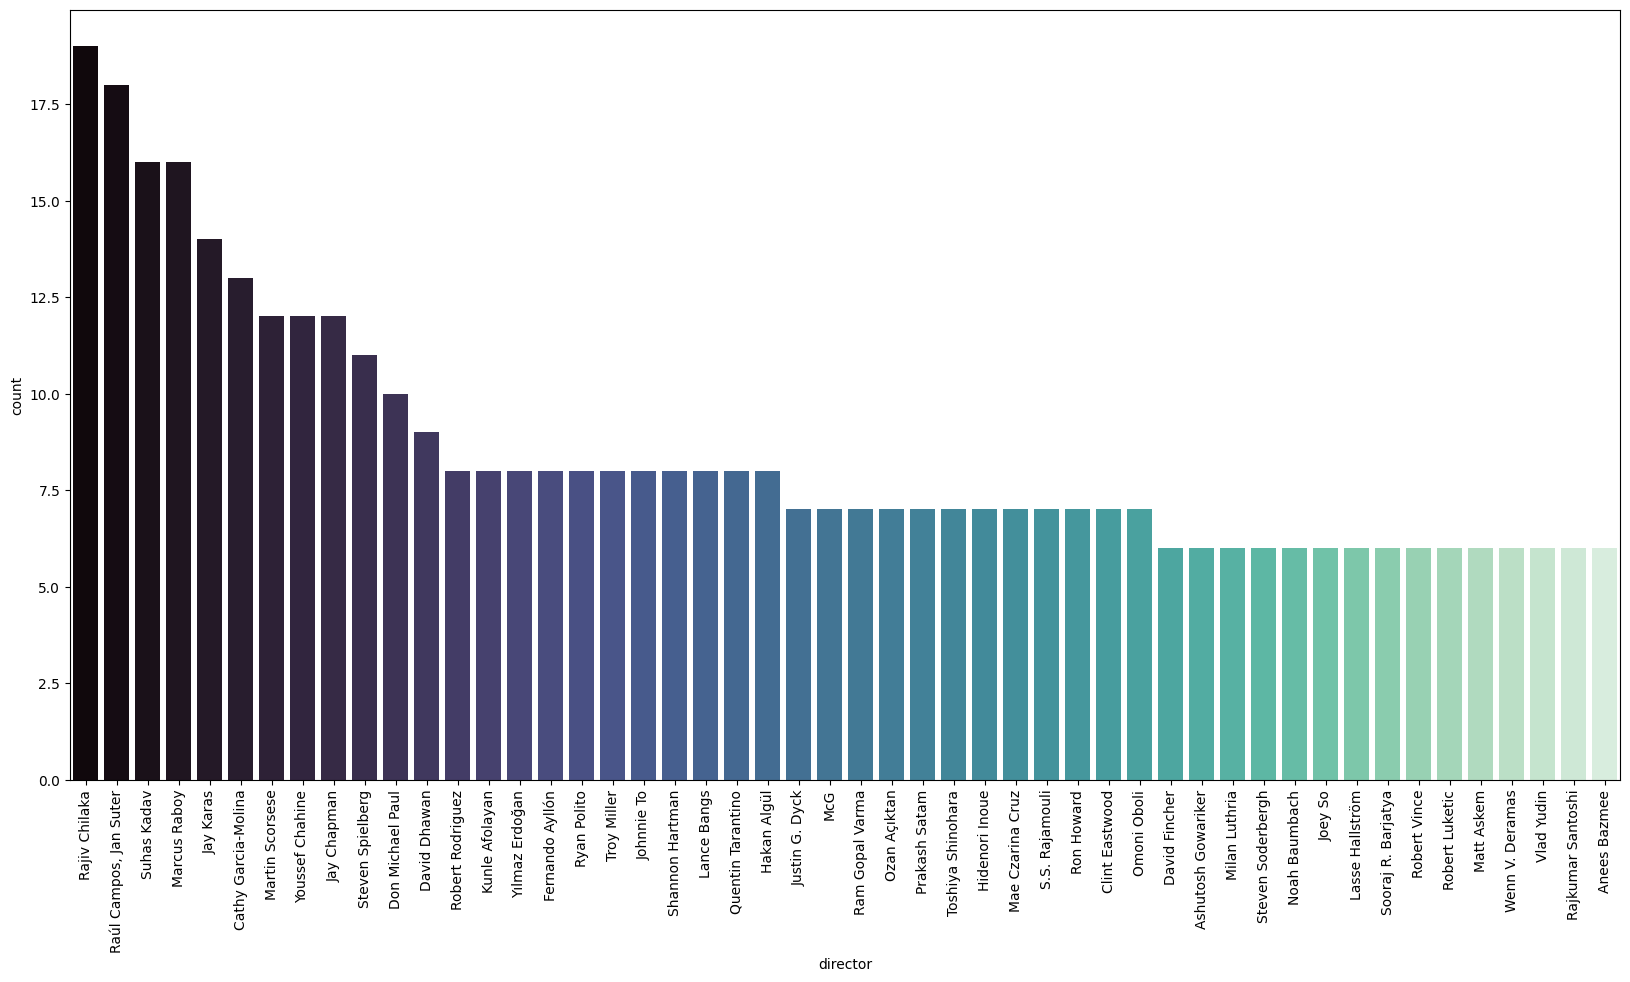

In [9]:
plt.figure(figsize = (20 , 10))
plt.xticks(rotation = 90)
sns.countplot(data = df , x = df['director'] , palette='mako', order=df['director'].value_counts().index[0:50])
plt.show()

/tmp/ipython-input-1429546918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = "rating" , palette = "plasma", ax = ax)


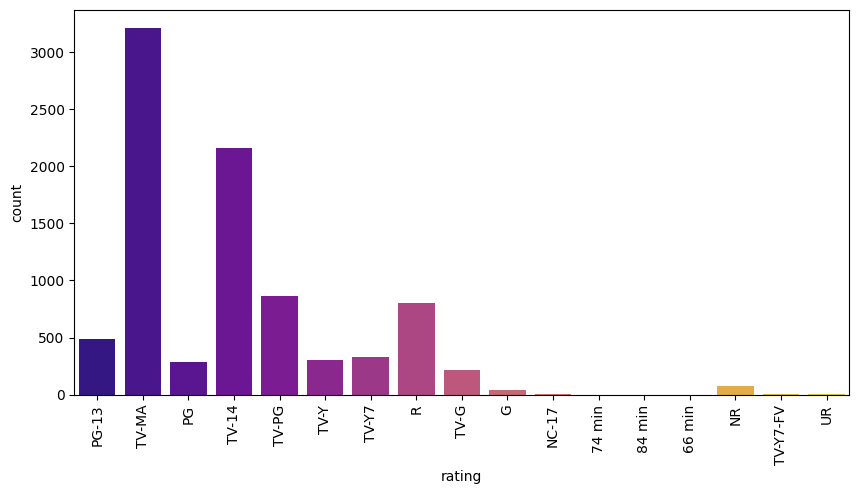

In [10]:
a,ax = plt.subplots(figsize=(10,5))
sns.countplot(data = df , x = "rating" , palette = "plasma", ax = ax)
plt.xticks(rotation = 90)
plt.show()

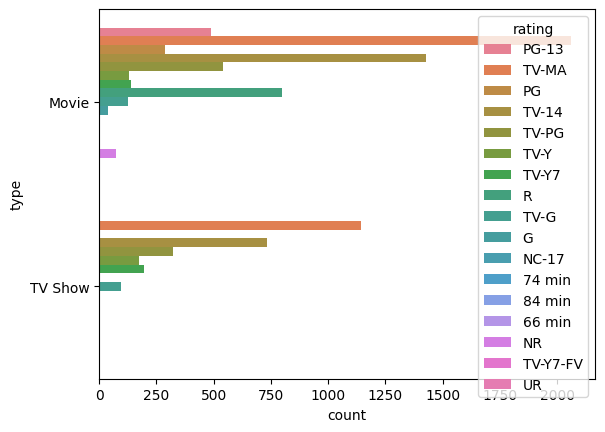

In [11]:
sns.countplot(data = df , y = "type", hue = "rating")
plt.show()

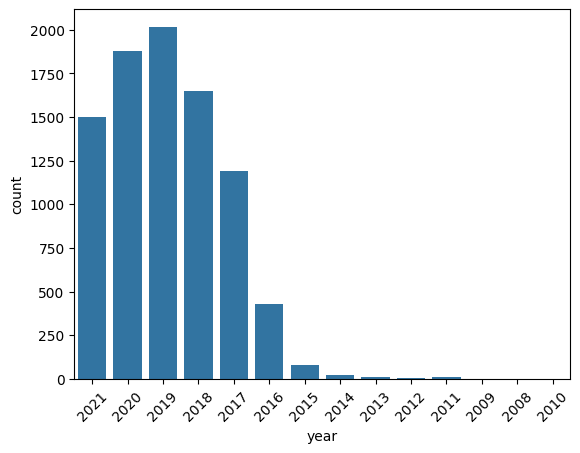

In [12]:
date = df[["date_added"]].dropna()
date['year'] = date["date_added"].apply(lambda i: i.split(', ')[1])
date['month'] = date["date_added"].apply(lambda i: i.lstrip().split(' ')[0])
plt.xticks(rotation = 45)
sns.countplot(x=date['year'])
plt.show()

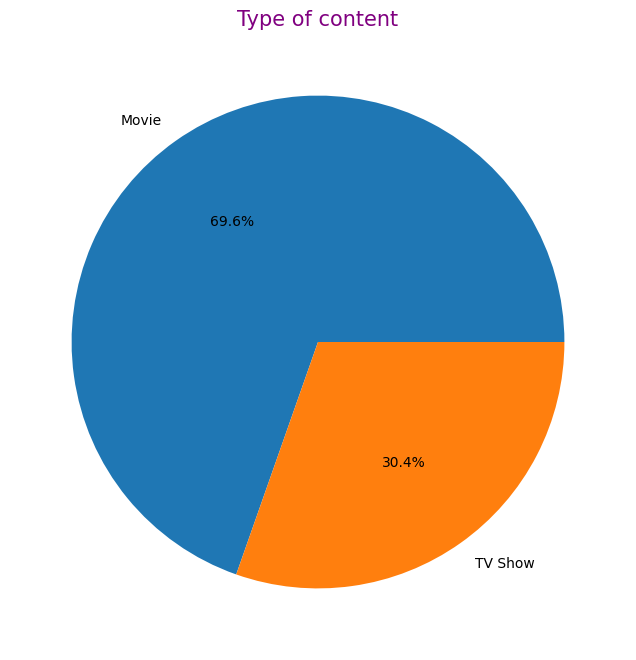

In [13]:
labels = df["type"].value_counts().index
sizes = df["type"].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels = labels, rotatelabels=False, autopct='%1.1f%%')
plt.title('Type of content', color = 'purple', fontsize = 15)
plt.show()

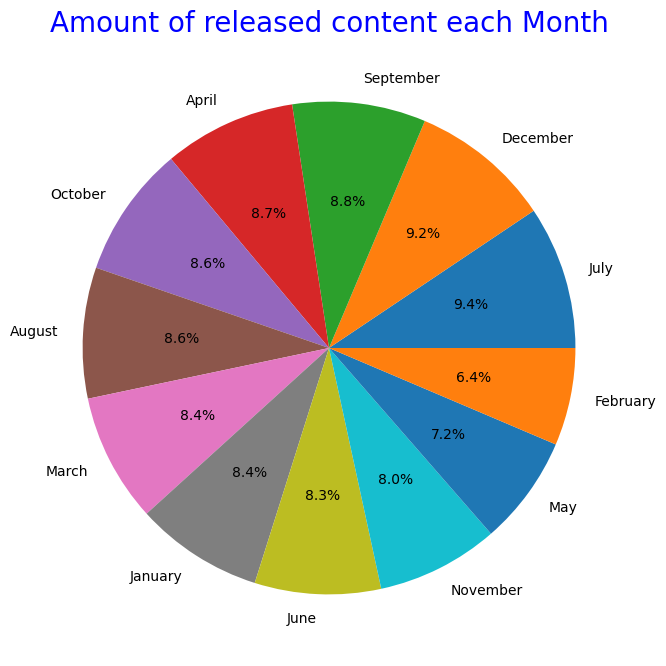

In [14]:
labels = date['month'].value_counts().index
sizes = date['month'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels = labels, rotatelabels=False, autopct = '%1.1f%%')
plt.title('Amount of released content each Month',color = 'Blue',fontsize = 20)
plt.show()

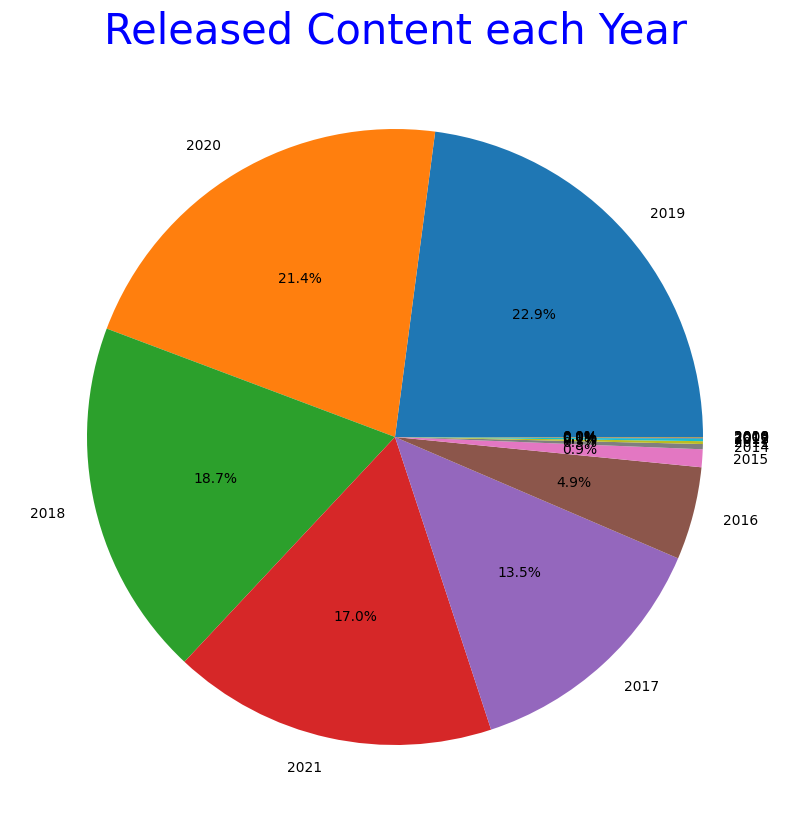

In [15]:
labels = date['year'].value_counts().index
sizes = date['year'].value_counts()
plt.figure(figsize = (15,10))
plt.pie(sizes, labels = labels, rotatelabels = False, autopct = '%1.1f%%')
plt.title('Released Content each Year', color = 'Blue', fontsize = 30)
plt.show()

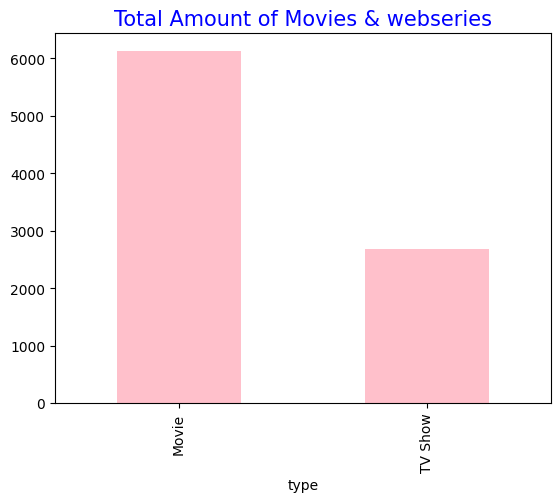

In [16]:
df.type.value_counts().plot(kind = "bar", color = "pink")
plt.title("Total Amount of Movies & webseries", color = 'Blue', fontsize = 15)
plt.show()

In [17]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df["added_month"] = pd.to_datetime(df.date_added, format ="%d/%m/%Y").dt.month
df["added_year"] = pd.to_datetime(df.date_added, format ="%d/%m/%Y").dt.year
df["added_day"] = pd.to_datetime(df.date_added, format ="%d/%m/%Y").dt.day
df["added_day_name"] = pd.to_datetime(df.date_added, format ="%d/%m/%Y").dt.day_name()

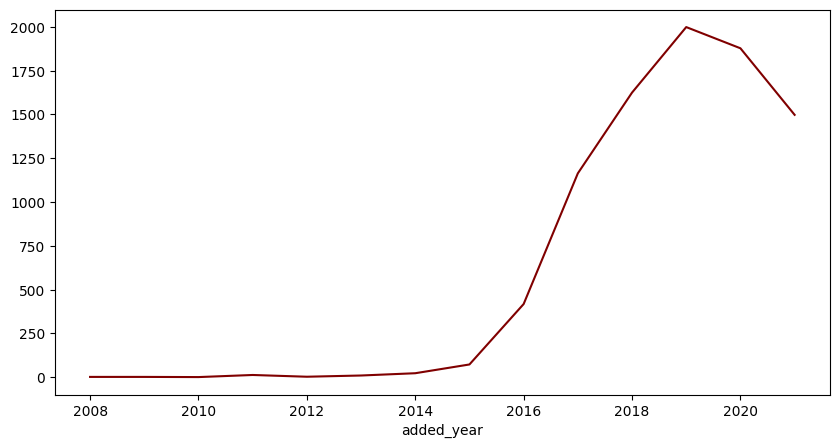

In [18]:
# Now you can group by 'added_year':
shows_per_year = df.groupby("added_year")["title"].count()
shows_per_year.plot(kind ="line", figsize=(10,5),color="maroon");

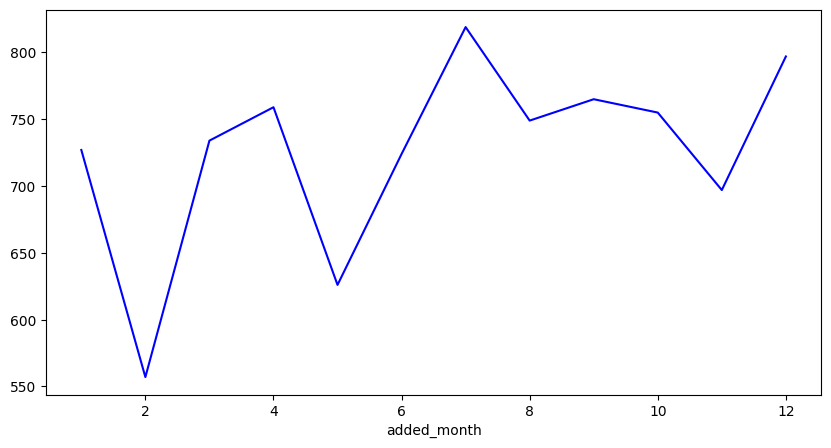

In [19]:
#  Now you can group by 'added_month':
shows_per_year = df.groupby("added_month")["title"].count()
shows_per_year.plot(kind ="line", figsize=(10,5),color="blue");

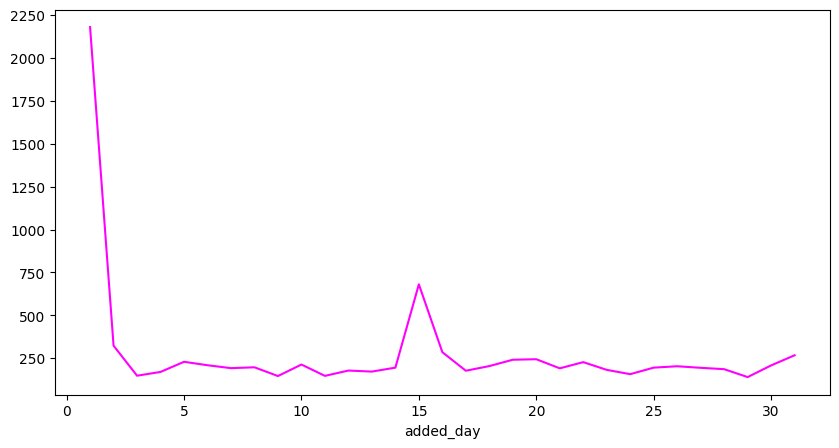

In [20]:
# Now you can group by 'added_day':
shows_per_year = df.groupby("added_day")["title"].count()
shows_per_year.plot(kind ="line", figsize=(10,5),color="magenta");

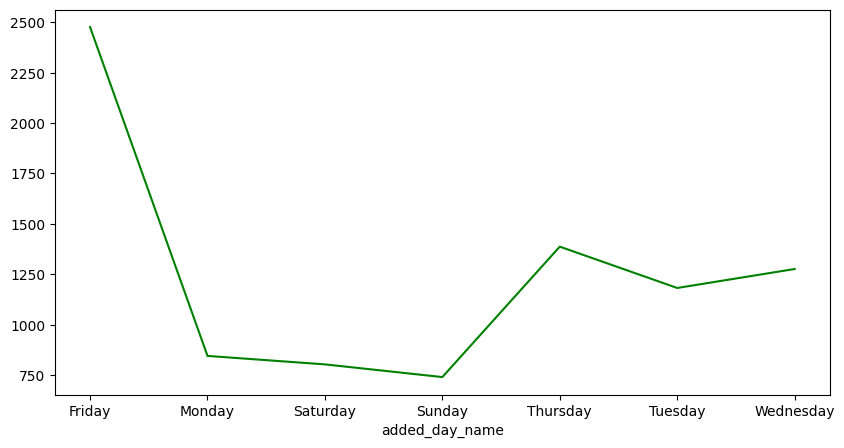

In [21]:
#  Now you can group by 'added_day_name':
shows_per_year = df.groupby("added_day_name")["title"].count()
shows_per_year.plot(kind ="line", figsize=(10,5), color = "green");

In [22]:
list_of_categories = []
for i in df["listed_in"].dropna():
  x = i.split(", ")
  for j in x:
    list_of_categories.append(j.strip())

list_of_categories = pd.DataFrame(list_of_categories)
top_10_categories = list_of_categories.value_counts()[:15]

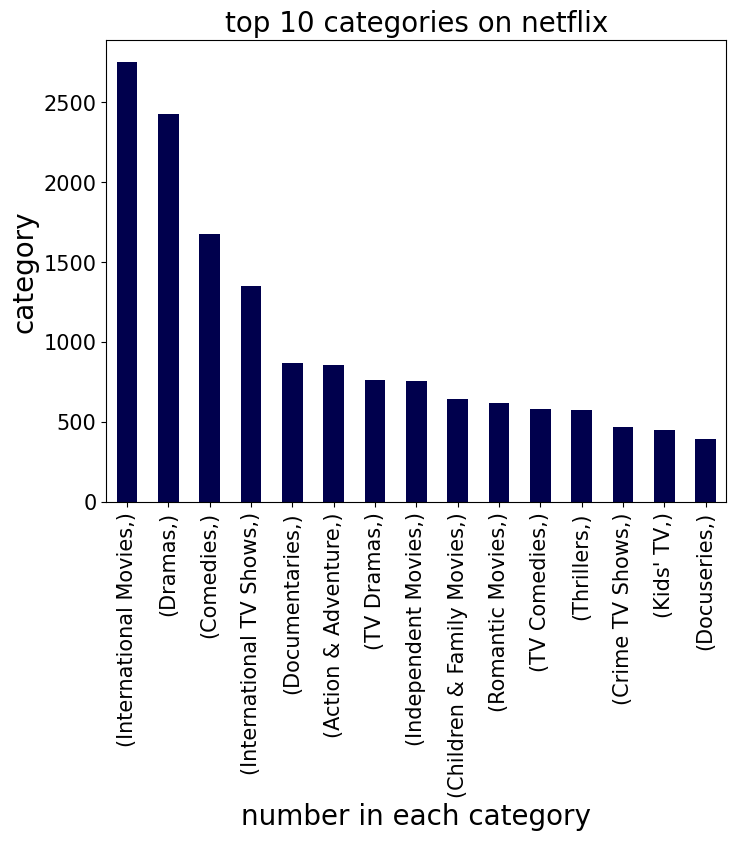

In [23]:
plt.figure(figsize = (8,6))
top_10_categories.plot(kind="bar", fontsize=15, colormap="seismic");
plt.ylabel("category", fontsize = 20);
plt.xlabel("number in each category", fontsize = 20);
plt.title("top 10 categories on netflix", fontsize=20);
plt.show()

In [24]:
list_of_countries = []
for i in df["country"].dropna():
  x = i.split(", ")
  for j in x:
    list_of_countries.append(j.strip())

list_of_countries = pd.DataFrame(list_of_countries)
top_10_countries = list_of_countries.value_counts()[:15]

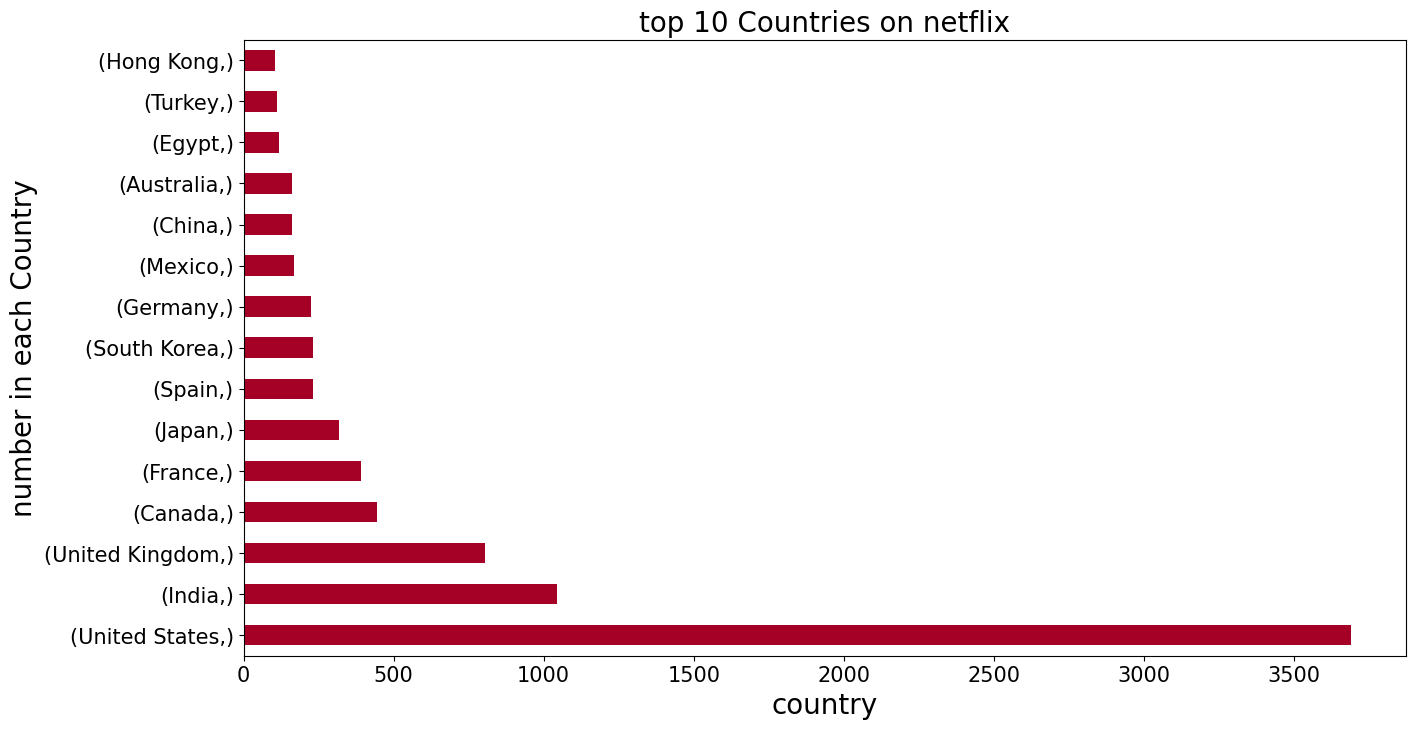

In [25]:
plt.figure(figsize = (15,8))
top_10_countries.plot(kind="barh", fontsize=15, colormap="RdYlBu");
plt.xlabel("country", fontsize = 20);
plt.ylabel("number in each Country", fontsize = 20);
plt.title("top 10 Countries on netflix", fontsize = 20);
plt.show()

In [26]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,98
release_year,0
rating,4
duration,3


In [27]:
df = df.fillna('Not specified')

In [28]:
df.nunique(axis = 0)

,0
show_id,8807
type,2
title,8807
director,4529
cast,7693
country,749
date_added,1700
release_year,74
rating,18
duration,221


In [29]:
director_name = pd.DataFrame()
director_name = df['director'].str.split(',', expand = True).stack()
director_name = director_name.to_frame()
director_name.columns = ['Director']
directors = director_name.groupby(['Director']).size().reset_index(name='Total Content')
directors = directors[directors.Director != 'Not specified']
directors = directors.sort_values(by=['Total Content'], ascending=False)
directorsTop10 = directors.head(10)
directorsTop10 = directorsTop10.sort_values(by=['Total Content'])
fig1 = px.bar(directorsTop10, x='Total Content', y='Director', title='Top 10 Directors on Netflix')
fig1.update_traces(marker_color='purple')
fig1.show()

In [30]:
cast_name = pd.DataFrame()
cast_name = df['cast'].str.split(',', expand = True).stack()
cast_name = cast_name.to_frame()
cast_name.columns = ['Actor']
actors = cast_name.groupby(['Actor']).size().reset_index(name = 'Total Content')
actors = actors[actors.Actor != 'Not specified']
actors = actors.sort_values(by=['Total Content'], ascending=False)
actorsTop10 = actors.head(10)
actorsTop10 = actorsTop10.sort_values(by=['Total Content'])
fig2 = px.bar(actorsTop10, x='Total Content', y='Actor', title='Top 10 Actors on Netflix')
fig2.update_traces(marker_color='blue')
fig2.show()


In [31]:
p = df.groupby(['rating']).size().reset_index(name = 'counts')
piechart = px.pie(p, values = 'counts', names = 'rating',title = 'Ratings on diffeerent kind of contents on Netflix',
                  color_discrete_sequence=px.colors.sequential.RdBu)
piechart.update_traces(marker = dict(line = dict(color = '#000000', width = 1)))
piechart.show()

In [32]:
df1 = df[['type','release_year']]
df1 = df1.rename(columns = {"release_year": "Releasing Year"})
df2 = df1.groupby(['Releasing Year', 'type']).size().reset_index(name = 'Total Content')
df2 = df2[df2['Releasing Year']>=2010]
fig3 = px.line(df2, x="Releasing Year", y = "Total Content", color = 'type',
               title = 'Trend of content produced over the years on Netflix')
fig3.show()

In [33]:
dfx = df[['release_year','description']]
dfx = dfx.rename(columns = {'release_year':'Release Year'})
for index, row in dfx.iterrows():
  z = row['description']
  testimonial = TextBlob(z)
  p = testimonial.sentiment.polarity
  if p == 0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  dfx.loc[[index,2],'Sentiment'] = sent

dfx = dfx.groupby(['Release Year','Sentiment']).size().reset_index(name = 'Total Content')
dfx = dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y = "Total Content", title = "Sentiment of content on Netflix", color = "Sentiment", pattern_shape = "Sentiment")
fig4.show()